In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r'F:\Bepec AI Training\Data Cleaning\Automobile price data _Raw_.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
auto_data = df.copy()
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
for i in auto_data.columns:
    print('\n',i)
    print(auto_data[i].unique())


 symboling
[ 3  1  2  0 -1 -2]

 normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

 make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

 fuel-type
['gas' 'diesel']

 aspiration
['std' 'turbo']

 num-of-doors
['two' 'four' '?']

 body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

 drive-wheels
['rwd' 'fwd' '4wd']

 engine-location
['front' 'rear']

 wheel-base
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

Errors in the Dataset
There are some errors in the dataset. They are :

Certain columns have '?' in place of values. These columns are:
 a. normalized-losses
 b. num-of-doors
 c. bore
 d. stroke
 e. peak-rpm
 f. price
 g. horsepower
Therefore we need to use certain imputation techniques in order to fillup the missing values.

Certain columns have object as datatype which should not be. These columns are :
 a. normalized-losses (float64)
 b. stroke (float64)
 c. horsepower (float64)
 d. peak-rpm (float64)
 e. price (float64)
 f. bore (float64)
Therefore we need to convert the columns first to their respective datatypes.

In [7]:
auto_data = auto_data.replace('?',np.nan)
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [8]:
auto_data['normalized-losses'] = auto_data['normalized-losses'].astype(float)
auto_data['stroke'] = auto_data['stroke'].astype(float)
auto_data['horsepower'] = auto_data['horsepower'].astype(float)
auto_data['peak-rpm'] = auto_data['peak-rpm'].astype(float)
auto_data['price'] = auto_data['price'].astype(float)
auto_data['bore'] = auto_data['bore'].astype(float)

In [9]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
auto_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

115.0

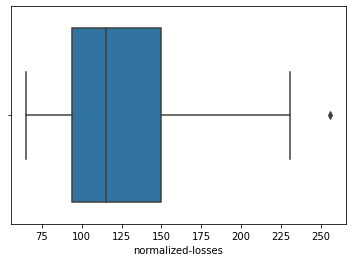

In [11]:
sns.boxplot(auto_data['normalized-losses'])
median_loss = auto_data['normalized-losses'].median()
median_loss

In [12]:
mode_door = auto_data['num-of-doors'].mode()
mode_door

0    four
dtype: object

3.3297512437810957

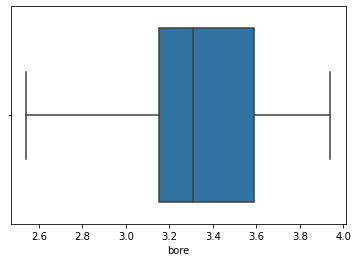

In [13]:
sns.boxplot(auto_data['bore'])
mean_bore = auto_data['bore'].mean()
mean_bore

3.29

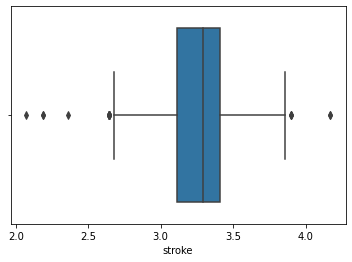

In [14]:
sns.boxplot(auto_data['stroke'])
median_stroke = auto_data['stroke'].median()
median_stroke

5200.0

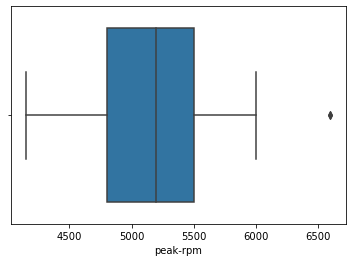

In [15]:
sns.boxplot(auto_data['peak-rpm'])
median_rpm = auto_data['peak-rpm'].median()
median_rpm

10295.0

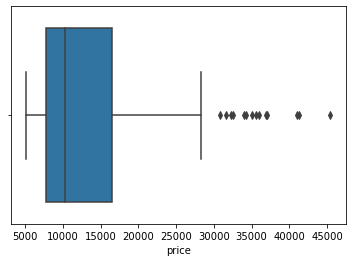

In [16]:
sns.boxplot(auto_data['price'])
median_price = auto_data['price'].median()
median_price

95.0

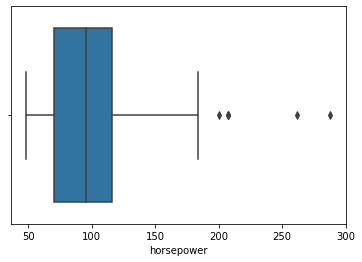

In [17]:
sns.boxplot(auto_data['horsepower'])
median_pwr = auto_data['horsepower'].median()
median_pwr

In [18]:
auto_data1 = auto_data.copy()

In [19]:
auto_data1['normalized-losses'] = auto_data1['normalized-losses'].fillna(median_loss)
auto_data1['num-of-doors'] = auto_data1['num-of-doors'].fillna(mode_door[0])
auto_data1['bore'] = auto_data1['bore'].fillna(mean_bore)
auto_data1['stroke'] = auto_data1['stroke'].fillna(median_stroke)
auto_data1['peak-rpm'] = auto_data1['peak-rpm'].fillna(median_rpm)
auto_data1['price'] = auto_data1['price'].fillna(median_price)
auto_data1['horsepower'] = auto_data1['horsepower'].fillna(median_pwr)
auto_data1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,10295.0


In [20]:
auto_data1.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

What did I do with the columns with '?'
Firstly I checked all the numerical columns such as 'normalized-losses', 'bore', 'stroke', 'peak-rpm', 'price', 'horsepower' for any outliers. For this I plotted boxplot for all the columns. For those columns, which had outliers, I filled up the missing values with their median values and for those who didn't, I filled up the missing values with their mean value.

Then for the categorical column ('num-of-doors') I filled the missing values with the mode of that column.

In [21]:
auto_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Linear Regression

<AxesSubplot:>

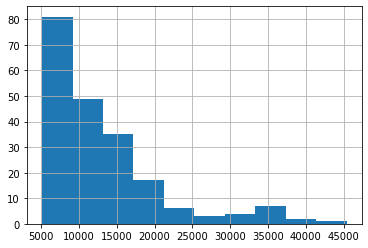

In [22]:
auto_data1['price'].hist()

In [23]:
auto_data1.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.457484,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.004928,-0.178515,0.071064,0.273851,-0.035823,0.034606,-0.080149
normalized-losses,0.457484,1.000000,-0.073709,-0.006837,0.058378,-0.365674,0.064343,0.072536,-0.049109,0.046739,-0.114772,0.166964,0.241134,-0.189530,-0.149357,0.095489
wheel-base,-0.531954,-0.073709,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.159684,0.249786,0.352876,-0.361338,-0.470414,-0.544082,0.584847
length,-0.357612,-0.006837,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.128622,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.686567
width,-0.232919,0.058378,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182708,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.724558
height,-0.541038,-0.365674,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.058994,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.140439
curb-weight,-0.227691,0.064343,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168164,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.819817
engine-size,-0.105790,0.072536,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.200246,0.028971,0.810216,-0.244383,-0.653658,-0.677470,0.860343
bore,-0.130083,-0.049109,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055902,0.005201,0.574480,-0.253993,-0.584508,-0.586992,0.532865
stroke,-0.004928,0.046739,0.159684,0.128622,0.182708,-0.058994,0.168164,0.200246,-0.055902,1.000000,0.185679,0.083804,-0.059716,-0.044973,-0.046389,0.083627


<AxesSubplot:xlabel='normalized-losses', ylabel='price'>

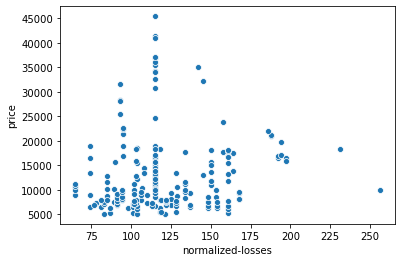

In [24]:
sns.scatterplot(x = 'normalized-losses', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

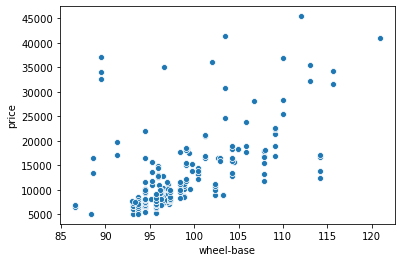

In [25]:
sns.scatterplot(x = 'wheel-base', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='length', ylabel='price'>

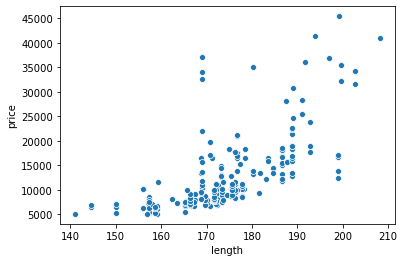

In [26]:
sns.scatterplot(x = 'length', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='width', ylabel='price'>

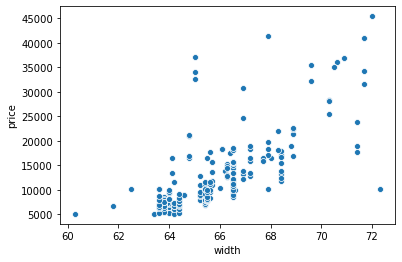

In [27]:
sns.scatterplot(x = 'width', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='height', ylabel='price'>

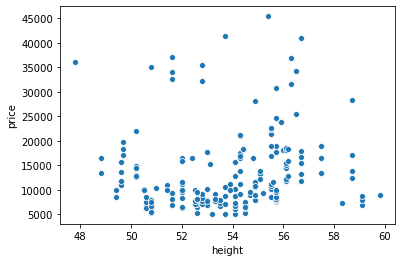

In [28]:
sns.scatterplot(x = 'height', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

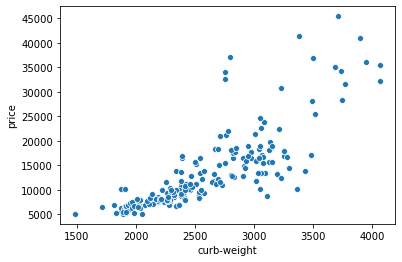

In [29]:
sns.scatterplot(x = 'curb-weight', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

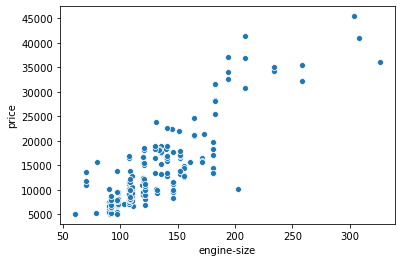

In [30]:
sns.scatterplot(x = 'engine-size', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='bore', ylabel='price'>

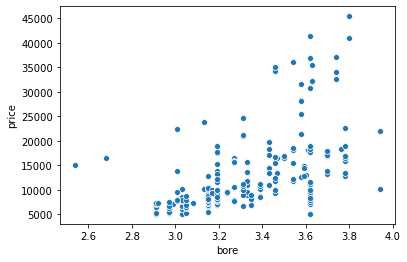

In [31]:
sns.scatterplot(x = 'bore', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='stroke', ylabel='price'>

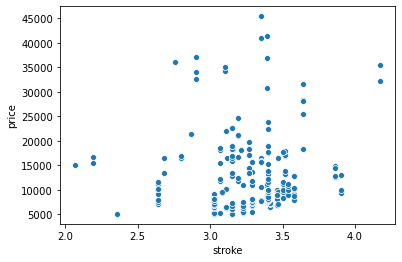

In [32]:
sns.scatterplot(x = 'stroke', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='compression-ratio', ylabel='price'>

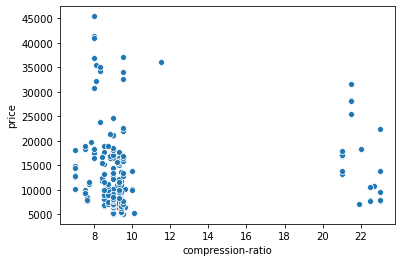

In [33]:
sns.scatterplot(x = 'compression-ratio', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

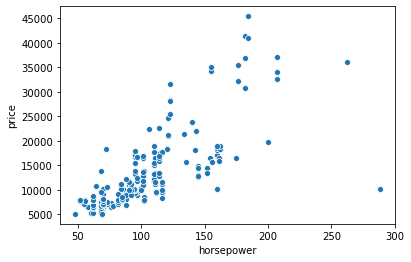

In [34]:
sns.scatterplot(x = 'horsepower', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

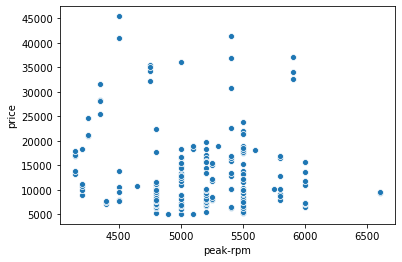

In [35]:
sns.scatterplot(x = 'peak-rpm', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

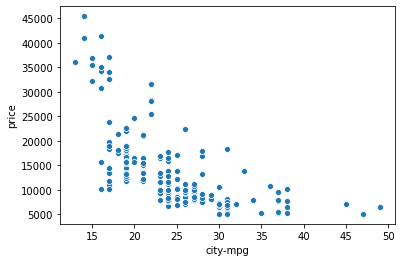

In [36]:
sns.scatterplot(x = 'city-mpg', y = 'price', data = auto_data1)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

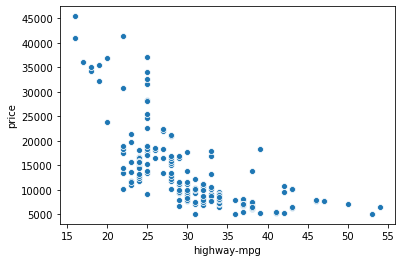

In [37]:
sns.scatterplot(x = 'highway-mpg', y = 'price', data = auto_data1)

In [38]:
from sklearn.preprocessing import LabelBinarizer

auto_data2 = auto_data1.copy()
lbl = LabelBinarizer()

auto_data2 = auto_data2.join(pd.DataFrame(lbl.fit_transform(auto_data2["make"]),columns=lbl.classes_, index=auto_data2.index))
auto_data2 = auto_data2.join(pd.DataFrame(lbl.fit_transform(auto_data2["body-style"]),columns=lbl.classes_, index=auto_data2.index))
auto_data2 = auto_data2.join(pd.DataFrame(lbl.fit_transform(auto_data2["engine-type"]),columns=lbl.classes_, index=auto_data2.index))
auto_data2 = auto_data2.join(pd.DataFrame(lbl.fit_transform(auto_data2["fuel-system"]),columns=lbl.classes_, index=auto_data2.index))
auto_data2 = auto_data2.join(pd.DataFrame(lbl.fit_transform(auto_data2["drive-wheels"]),columns=lbl.classes_, index=auto_data2.index))
auto_data2 = auto_data2.join(pd.DataFrame(lbl.fit_transform(auto_data2["num-of-cylinders"]),columns=lbl.classes_, index=auto_data2.index))

data_dummies = pd.get_dummies(auto_data2["fuel-type"], prefix='fuel-type')
auto_data2 = pd.concat([auto_data2, data_dummies], axis=1)
data_dummies = pd.get_dummies(auto_data2["aspiration"], prefix='aspiration')
auto_data2 = pd.concat([auto_data2, data_dummies], axis=1)
data_dummies = pd.get_dummies(auto_data2["num-of-doors"], prefix='num-of-doors')
auto_data2 = pd.concat([auto_data2, data_dummies], axis=1)
data_dummies = pd.get_dummies(auto_data2["engine-location"], prefix='engine-location')
auto_data2 = pd.concat([auto_data2, data_dummies], axis=1)

lst = ['fuel-type','aspiration','num-of-doors','engine-location','make','body-style','engine-type','fuel-system','drive-wheels','num-of-cylinders']
auto_data2.drop(lst, axis = 1,inplace = True)
auto_data2

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,twelve,two,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,engine-location_front,engine-location_rear
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,1,0,0,1,1,0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,1,0,0,1,1,0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,1,0,0,1,1,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,1,1,0,1,0,1,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,1,1,0,1,0,1,0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,1,0,1,1,0,1,0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,1,1,0,1,0,1,0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,1,0,0,1,1,0,1,0


In [39]:
auto_data2.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,twelve,two,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,engine-location_front,engine-location_rear
symboling,1.000000,0.457484,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.004928,...,-0.047012,0.245950,-0.194311,0.194311,0.059866,-0.059866,-0.663595,0.663595,-0.212471,0.212471
normalized-losses,0.457484,1.000000,-0.073709,-0.006837,0.058378,-0.365674,0.064343,0.072536,-0.049109,0.046739,...,-0.012358,0.130721,-0.104668,0.104668,0.011273,-0.011273,-0.348850,0.348850,0.021510,-0.021510
wheel-base,-0.531954,-0.073709,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.159684,...,0.037803,-0.081174,0.308346,-0.308346,-0.257611,0.257611,0.439635,-0.439635,0.187790,-0.187790
length,-0.357612,-0.006837,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.128622,...,0.100413,-0.057877,0.212679,-0.212679,-0.234539,0.234539,0.385675,-0.385675,0.050989,-0.050989
width,-0.232919,0.058378,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182708,...,0.153516,-0.013699,0.233880,-0.233880,-0.300567,0.300567,0.197735,-0.197735,0.051698,-0.051698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aspiration_turbo,-0.059866,-0.011273,0.257611,0.234539,0.300567,0.087311,0.324902,0.108217,0.212623,0.221932,...,-0.032857,-0.066203,0.401397,-0.401397,-1.000000,1.000000,0.052803,-0.052803,0.057191,-0.057191
num-of-doors_four,-0.663595,-0.348850,0.439635,0.385675,0.197735,0.540286,0.190720,0.013919,0.108510,-0.009353,...,-0.079932,-0.161052,0.188496,-0.188496,-0.052803,0.052803,1.000000,-1.000000,0.139129,-0.139129
num-of-doors_two,0.663595,0.348850,-0.439635,-0.385675,-0.197735,-0.540286,-0.190720,-0.013919,-0.108510,0.009353,...,0.079932,0.161052,-0.188496,0.188496,0.052803,-0.052803,-1.000000,1.000000,-0.139129,0.139129
engine-location_front,-0.212471,0.021510,0.187790,0.050989,0.051698,0.106234,-0.050468,-0.196826,-0.185044,0.138705,...,0.008532,0.017192,0.040070,-0.040070,-0.057191,0.057191,0.139129,-0.139129,1.000000,-1.000000


In [53]:
auto_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 76 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   normalized-losses      205 non-null    float64
 2   wheel-base             205 non-null    float64
 3   length                 205 non-null    float64
 4   width                  205 non-null    float64
 5   height                 205 non-null    float64
 6   curb-weight            205 non-null    int64  
 7   engine-size            205 non-null    int64  
 8   bore                   205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compression-ratio      205 non-null    float64
 11  horsepower             205 non-null    float64
 12  peak-rpm               205 non-null    float64
 13  city-mpg               205 non-null    int64  
 14  highway-mpg            205 non-null    int64  
 15  price 

In [94]:
y = auto_data2.iloc[:,[15]]
x = auto_data2.drop('price',axis=1)

In [42]:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = np.array(x.iloc[:,:75])
vif = pd.DataFrame()
vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

C:\Users\C. Dev\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[6.552354841396048,
 3.4815610247378403,
 19.853655237947084,
 24.83637016932541,
 15.35198869152579,
 8.002521018675049,
 51.211206890175,
 74.80179558267973,
 16.704397270976028,
 6.4549554286097734,
 249.50791550771197,
 60.64232154369348,
 6.358330699475267,
 51.406892387164554,
 41.49449483426495,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

In [43]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   normalized-losses      205 non-null    float64
 2   wheel-base             205 non-null    float64
 3   length                 205 non-null    float64
 4   width                  205 non-null    float64
 5   height                 205 non-null    float64
 6   curb-weight            205 non-null    int64  
 7   engine-size            205 non-null    int64  
 8   bore                   205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compression-ratio      205 non-null    float64
 11  horsepower             205 non-null    float64
 12  peak-rpm               205 non-null    float64
 13  city-mpg               205 non-null    int64  
 14  highway-mpg            205 non-null    int64  
 15  alfa-r

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [185]:
# Checking for Linear Regression

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
print('Coeff. ', model.coef_)
print('Intercept', model.intercept_)

Coeff.  [[ 2.46112061e+02  3.46897560e+00  1.91469402e+02 -1.73193758e+02
   1.19060164e+03 -6.37325259e+01  4.57505078e+00  7.99183440e+01
  -3.10487963e+03 -1.77841704e+03 -1.22004160e+03 -2.32214825e+01
   1.81466872e+00  9.67839283e+01 -9.25649434e+01  2.61776279e+03
   2.60798802e+03  4.86755029e+03 -1.82804506e+03 -3.05282982e+03
   1.89914589e+02  1.52117578e+03  1.79379068e+03 -6.96922865e+02
   5.97008333e+03 -1.42491518e+03 -3.52957693e+03 -6.51442826e+02
  -3.20626768e+03 -4.00105747e+03  4.05466097e+03 -1.46334310e+03
   1.13824103e+03 -1.23868279e+03 -1.56262760e+03 -1.34314183e+03
  -7.62314342e+02  2.46421734e+03 -2.51466469e+02 -8.96281703e+02
  -5.53903023e+02 -7.62566145e+02  2.06365972e+03 -1.67792475e+04
   1.80140691e+03  4.62590599e+03  4.43530621e+03  1.72814204e+02
   3.68015452e+03 -1.91955086e+03  7.92588390e+02 -2.51304277e+03
   5.64530629e+03 -7.38144078e+01  5.32707118e+02  4.25843462e+02
  -2.89003722e+03 -1.17080456e+03 -2.55988850e+02  1.42679341e+03
  

In [187]:
y_pred = model.predict(x_test)

In [188]:
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8617057367801472
9410258.931317532


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

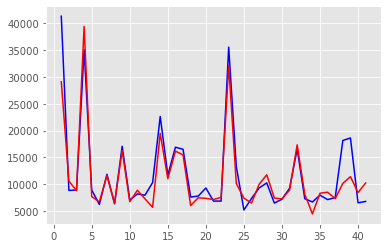

In [189]:
c = [i for i in range(1,42,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.xlabel()
plt.ylabel()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

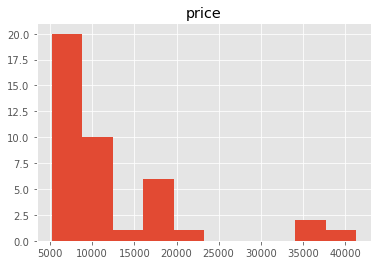

In [190]:
y_test.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

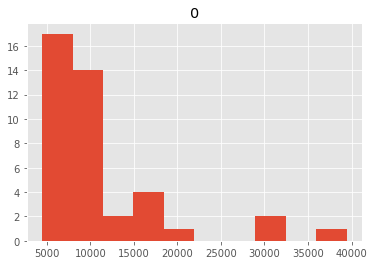

In [191]:
y_pred = pd.DataFrame(y_pred)
y_pred.hist()

In [192]:
scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
scores

array([-1.0974118 , -1.30713931, -1.41375838, -8.90291027,  0.67717534])

In [50]:
# checking for RFE

from sklearn.feature_selection import RFE

linreg = linear_model.LinearRegression()

for i in range(20,60):
    rfe = RFE(linreg, i)
    rfe = rfe.fit(x,y)
    d = rfe.support_
    g = x.columns
    a = g[d]
    x_f = x[a]
    x_train,x_test,y_train,y_test = train_test_split(x_f,y, test_size = 0.2)
    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(i," ",r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20   0.9459658645402556
4151687.0817868477
21   0.611180036041427
25426653.335127484


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22   0.9190554769709751
4987920.177186265


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23   0.8599434268938031
6113206.898743966
24   0.8799621346279279
5050275.182445217


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


25   0.9026141945525361
8945136.239235649
26   0.7333802070111506
4740842.117360524


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27   0.7005260586613543
20958659.666332778
28   0.8336735894998342
4719316.728889639


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


29   0.8885217073912612
10195634.865927257
30   0.9053103301478176
7126457.819833133


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


31   0.9262094042810494
5950676.297250699
32   0.9320148597861291
3253315.37425926


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


33   0.6319305380671332
7198026.256032294
34   0.9232907715924363
4242921.497902537


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35   0.7989520719759023
9775363.546181932
36   0.9016224379607894
3775699.9443729543


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


37   0.8340830388260217
7753799.692674497
38

C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   0.8739098961200432
5482321.143178055
39   0.9170014522329226
8283256.083479194


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

40   0.49281964455770044
16219444.278786628
41   0.9206208526343207
6338310.789768556
42   0.8776227327642001
7062294.893614907
43   0.9018616779497455
4482448.5437350655


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


44   0.9291189369697801
4059323.5978244804
45   0.8570614550864213
10153006.752313979


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


46   0.9196291154101741
6600824.883189667
47   0.9019575168564641
9418759.005212788


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


48   0.7796090170404402
4751335.330395988
49   0.6702641675078461
20629307.509055946


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50   0.8833205545324601
7710491.351002693
51   0.5497123925935525
28393586.544709153


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


52   0.7382206879506586
20497435.071244348
53   0.9405471771723553
4132280.0747410203


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


54   0.8970113414967678
4452559.10675722
55   0.8122902331352062
15480525.438414352


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


56   0.9595262244028385
4354786.50433735
57   0.8579505328255495
13214919.603660816


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


58   0.8182723749255906
13252355.113484818
59   0.5710536454304738
24620926.04177372


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
# Checking for Normalized data

from sklearn.preprocessing import Normalizer

auto_data_n = Normalizer().fit_transform(auto_data2)
auto_data_n = pd.DataFrame(auto_data_n)
print(auto_data_n)

           0         1         2         3         4         5         6   \
0    0.000205  0.007867  0.006061  0.011547  0.004385  0.003338  0.174302   
1    0.000172  0.006598  0.005083  0.009684  0.003677  0.002800  0.146179   
2    0.000057  0.006581  0.005408  0.009798  0.003749  0.002999  0.161558   
3    0.000132  0.010804  0.006575  0.011634  0.004361  0.003577  0.153959   
4    0.000108  0.008857  0.005368  0.009538  0.003586  0.002933  0.152518   
..        ...       ...       ...       ...       ...       ...       ...   
200 -0.000056  0.005296  0.006082  0.010526  0.003841  0.003094  0.164578   
201 -0.000050  0.004749  0.005454  0.009438  0.003439  0.002774  0.152410   
202 -0.000045  0.004244  0.004874  0.008435  0.003078  0.002479  0.134561   
203 -0.000043  0.004094  0.004702  0.008137  0.002969  0.002392  0.138645   
204 -0.000043  0.004049  0.004650  0.008047  0.002937  0.002365  0.130502   

           7         8         9   ...   66   67        68        69  \
0  

In [219]:
y1 = auto_data_n.iloc[:,[15]]
x1 = auto_data_n.drop(15,axis=1)

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.2)
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
print('Coeff. ', model.coef_)
print('Intercept', model.intercept_)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

Coeff.  [[ 1.60408254e+01  1.58156858e+00 -6.93969550e+00  6.06175220e+00
   3.81360465e+01 -1.73815716e+01 -1.08891214e-01  5.54727821e-01
   4.79481525e+00  8.34403125e+01 -2.84443925e+01 -1.98722220e+00
  -5.13508273e-01 -2.50636109e+01  1.89883250e+01  6.02953116e+00
  -9.26989754e+00 -1.51431713e+00  1.81219925e+02 -3.23947355e+01
  -2.32394039e+01  3.30328230e+02 -1.14948056e+03  1.00523459e+02
  -7.87692934e+02  3.21357229e+02 -1.52264240e+02  1.27521800e+02
  -1.57517702e+02 -8.97859924e+01  6.28793493e+01 -1.24913524e+02
   3.81978773e+01  1.57624373e+02  1.97029449e+02  1.00763646e+02
   2.76831271e+02 -3.59021288e+01 -1.52930541e+02 -1.68374435e+02
  -1.45800591e+02 -1.24759474e+02 -1.79574533e+02  5.84464841e+02
  -1.57517702e+02 -3.48110540e+02 -3.63961119e+02 -1.30862800e+02
  -3.22053172e+01 -2.32394039e+01 -1.94571259e+02 -3.22053172e+01
  -1.30461892e+02 -8.32007687e+01 -9.41225987e+01  7.38434627e+01
  -1.43809394e+02 -8.26886268e+01 -1.99262817e+02 -3.45815726e+02
  

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

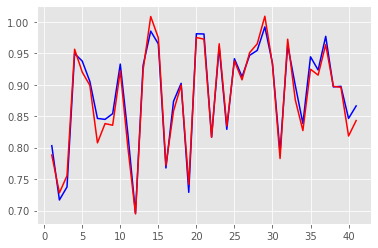

In [221]:
c = [i for i in range(1,42,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.xlabel()
plt.ylabel()

array([[<AxesSubplot:title={'center':'15'}>]], dtype=object)

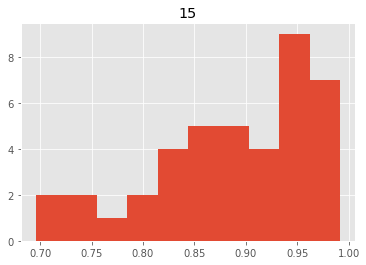

In [222]:
y_test.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

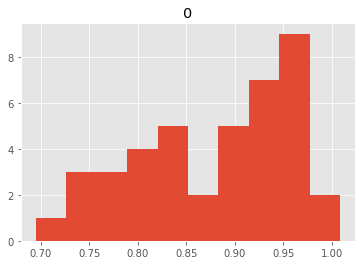

In [223]:
y_pred = pd.DataFrame(y_pred)
y_pred.hist()

In [224]:
scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
scores

array([0.95465388, 0.95411045, 0.97522384, 0.96159393, 0.82238521])

## Decision Tree Regressor

In [213]:
from sklearn.tree import DecisionTreeRegressor


x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8800499405426203
4558429.658536585


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

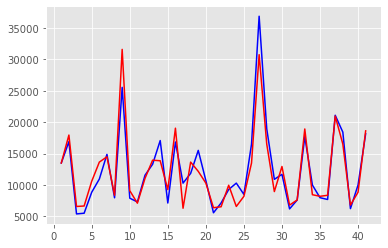

In [214]:
c = [i for i in range(1,42,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.xlabel()
plt.ylabel()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

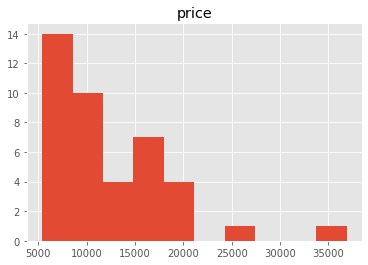

In [215]:
y_test.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

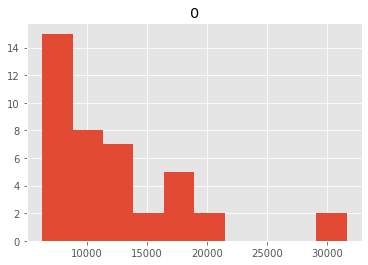

In [216]:
y_pred = pd.DataFrame(y_pred)
y_pred.hist()

In [217]:
scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
scores

array([ 0.82398288, -0.83439469,  0.89639674,  0.77797778,  0.70404997])

## Random Forest Regressor

In [203]:
from sklearn.ensemble import RandomForestRegressor

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)
model = RandomForestRegressor(random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9854552970688841
0.8098234792932126
7167520.254532519


C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C. Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

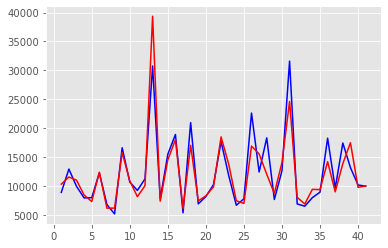

In [204]:
c = [i for i in range(1,42,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.xlabel()
plt.ylabel()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

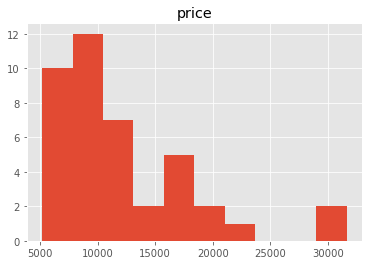

In [205]:
y_test.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

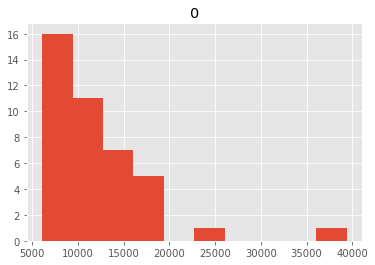

In [206]:
y_pred = pd.DataFrame(y_pred)
y_pred.hist()

In [207]:
scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
scores

C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\C. Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector 

array([ 0.45702747,  0.52186647,  0.77475184,  0.40257353, -0.37603479])

## KNN Regressor

In [129]:
from sklearn.neighbors import KNeighborsRegressor

x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.2)
for i in range(2,20):
    model = KNeighborsRegressor(n_neighbors= i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(i," ",r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))
    print(" ")

2   0.9965873964999262
2.2811985833638226e-05
 
3   0.9977620546999382
1.4959832421306869e-05
 
4   0.9982896732330702
1.1432898658531982e-05
 
5   0.9985836418427928
9.46782777925096e-06
 
6   0.9983038348443896
1.1338233551146075e-05
 
7   0.998053863756129
1.3009197354616551e-05
 
8   0.9970498684831967
1.9720532539813775e-05
 
9   0.9963244146762549
2.4569921566859335e-05
 
10   0.9955099648283602
3.0014216045248454e-05
 
11   0.9953683547930429
3.0960826490760455e-05
 
12   0.9950482005402673
3.310093865988178e-05
 
13   0.9945299368677737
3.65653386567635e-05
 
14   0.994130843111106
3.9233132065285535e-05
 
15   0.9935759660144686
4.2942279192289665e-05
 
16   0.9925867451790351
4.955485275489725e-05
 
17   0.9919119706423124
5.406546969949208e-05
 
18   0.9908995237196639
6.0833301021316663e-05
 
19   0.9902409027449838
6.52359374084082e-05
 


In [228]:
from sklearn.neighbors import KNeighborsRegressor

x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.2)
model = KNeighborsRegressor(n_neighbors= 5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9984841511581233
1.1949173772249735e-05


array([[<AxesSubplot:title={'center':'15'}>]], dtype=object)

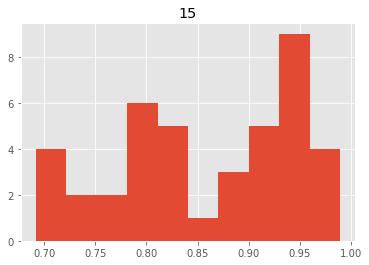

In [229]:
y_test.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

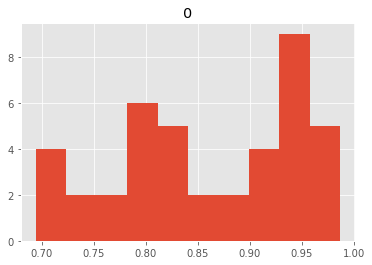

In [230]:
y_pred = pd.DataFrame(y_pred)
y_pred.hist()

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

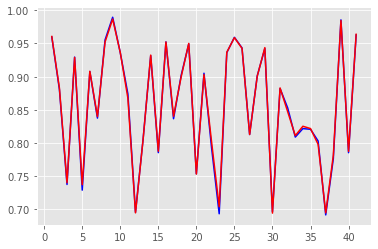

In [231]:
c = [i for i in range(1,42,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.xlabel()
plt.ylabel()

In [232]:
scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
scores

array([0.97655844, 0.98208291, 0.99134847, 0.98396276, 0.97551302])